1. 연관규칙 분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. 
그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또 번호를 막대그래프로 출력하고 이에 대해 설명하시오

In [6]:
import pandas as pd
import numpy as np

lotto = pd.read_csv("lotto.csv")
lotto.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [8]:
#Transaction data
trs_data = np.array(lotto.loc[:,"num1":])
onearray_list = []

for onearray in trs_data:
    minilist = []
    for num in onearray:
        minilist.append(str(num))
        
    onearray_list.append(minilist)
    
trs_df = pd.DataFrame({'transaction_id':lotto['time_id'],'item':onearray_list})
trs_df.head()

,transaction_id,item
0,859,"[8, 22, 35, 38, 39, 41]"
1,858,"[9, 13, 32, 38, 39, 43]"
2,857,"[6, 10, 16, 28, 34, 38]"
3,856,"[10, 24, 40, 41, 43, 44]"
4,855,"[8, 15, 17, 19, 43, 44]"


In [9]:
from collections import Counter
num_dict = Counter()

for item in trs_data:
    num_dict += Counter(item)
top10 = num_dict.most_common(10)

num_dict_sorted = pd.DataFrame({'num':num_dict.keys(),
                               'freq':num_dict.values()}).sort_values(by = 'freq',ascending=False)

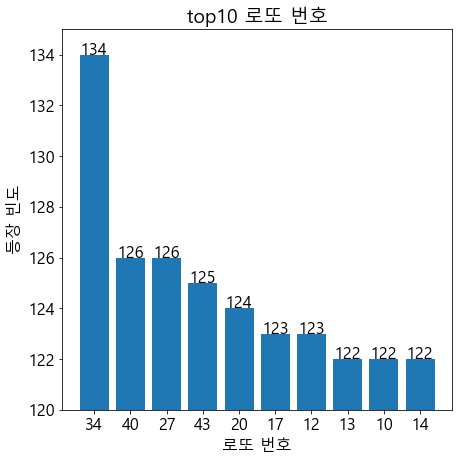

In [10]:
import matplotlib.pyplot as plt

num_list = list()
freq_list = list()

for pair in top10:
    num, freq = pair
    num_list.append("%s" %num)
    freq_list.append(freq)
    
plt.rcParams['figure.figsize'] = (7,7)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False

plt.bar(num_list, freq_list)
plt.xticks(num_list)
plt.ylim(120,135)
plt.xlabel('로또 번호')
plt.ylabel('등장 빈도')
plt.title('top10 로또 번호')
for i, pair in enumerate(top10):
    num, freq = pair
    plt.text(i,freq,"%s"%freq, horizontalalignment='center')
plt.show()

2. 변환한 데이터에 대해 apriori 함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 'rules_1'이라는 변수에 저장하여 결과를 해석하시오.(최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2, 최대조합 항목 수 : 6개) 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순으로 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 csv로 출력하시오.

In [12]:
#mlxtend 패키지 사용

!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit_transform(trs_data)

fitted_df = pd.DataFrame(te_ary, columns = te.columns_)
sup_df = apriori(fitted_df, min_support=0.002, use_colnames=True)

consup_df = association_rules(sup_df, metric='confidence', min_threshold = 0.8)

consup_df['antec_len'] = consup_df['antecedents'].apply(lambda x: len(x))
consup_df['conse_len'] = consup_df['consequents'].apply(lambda x: len(x))

rules_1 = consup_df.query('antec_len >= 2 and antec_len <=6 and conse_len==1').sort_values(by = 'lift',ascending=False)
rules_1.shape


(679, 11)

In [13]:
top1 = 34
rules_most_freq = rules_1[rules_1['consequents'] == {top1}]
print(len(rules_most_freq))
rules_most_freq

19


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antec_len,conse_len
486,"(41, 19, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
542,"(17, 42, 45)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
192,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
579,"(24, 22, 31)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
693,"(19, 44, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
641,"(24, 31, 22, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
8,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
603,"(42, 45, 23)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
419,"(12, 37, 36)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,3,1
539,"(32, 17, 33)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf,3,1


가장 많이 추첨된 번호 34가 우측항에 존재하는 규칙들은 총 19개가 도출되었다. 
첫번째 줄의 규칙을 확인해 보면, {41, 19, 15}번과 {34}번이 함께 추첨될 확률은 지지도를 확인한 결과, 0.002328이며 약 0.2%에 해당한다. 
이 규칙의 향상도는 6.410448로 이는 {34}만 추첨됐을 때보다 {41, 19, 15}번이 뽑히고 {34}도 뽑힐 확률이 약 6배 높다는 것을 의미한다. 
하지만 이러한 규칙들은 로또번호가 추첨되는 순서를 고려하지 않고 단순히 조합에 대한 확률만을 고려한 규칙이므로 
향상도가 높은 숫자들의 조합이 로또 추첨번호가 될 가능성이 높은 것은 아니다.

